In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import platform

from Detector_Classes.M3RefTracking import M3RefTracking
from Detector_Classes.DetectorConfigLoader import DetectorConfigLoader
from Detector_Classes.DreamDetector import DreamDetector


In [2]:
# Check if platform is Windows or Linux
if platform.system() == 'Windows':
    base_dir = 'F:/Saclay/cosmic_data/'
    det_type_info_dir = 'C:/Users/Dylan/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = 'F:/Saclay/Analysis/Cosmic Bench/11-5-24/'
    chunk_size = 100  # Number of files to process at once
elif platform.system() == 'Linux':
    base_dir = '/local/home/dn277127/Bureau/cosmic_data/'
    det_type_info_dir = '/local/home/dn277127/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = '/local/home/dn277127/Bureau/cosmic_data/Analysis/11-15-24/'
    chunk_size = 7  # Number of files to process at once
else:
    raise OSError('Unknown platform')

In [3]:
run_name = 'drift_scan_11-13-24'
run_dir = f'{base_dir}{run_name}/'
sub_run_name = 'drift_200'
# sub_run_name = 'drift_800'

det_single = 'scintillator_top'
scint_top_name = 'scintillator_top'
scint_bot_name = 'scintillator_bot'

# file_nums = list(range(0, 50))
file_nums = 'all'

# connector_channels = {4: np.array([21])}
connector_channels = {4: np.array([20, 21])}
# connector_channels = None

run_json_path = f'{run_dir}run_config.json'
data_dir = f'{run_dir}{sub_run_name}/filtered_root/'
ped_dir = f'{run_dir}{sub_run_name}/decoded_root/'
m3_dir = f'{run_dir}{sub_run_name}/m3_tracking_root/'

try:
    os.mkdir(out_dir)
except FileExistsError:
    pass

In [4]:
det_config_loader = DetectorConfigLoader(run_json_path, det_type_info_dir)

In [5]:
print(f'Getting ray data...')
ray_data = M3RefTracking(m3_dir, single_track=True, file_nums=file_nums)

Getting ray data...


100%|██████████| 8/8 [00:00<00:00, 30.79it/s]


In [6]:
det_config_top = det_config_loader.get_det_config(scint_top_name, sub_run_name=sub_run_name)
det_top = DreamDetector(config=det_config_top)
det_config_bot = det_config_loader.get_det_config(scint_bot_name, sub_run_name=sub_run_name)
det_bot = DreamDetector(config=det_config_bot)

Error: Detector type scintillator not found in det map types.
Error: Detector type scintillator not found in det map types.


In [7]:
x_top, y_top, event_nums_top = ray_data.get_xy_positions(det_top.center[2])
x_bot, y_bot, event_nums_bot = ray_data.get_xy_positions(det_bot.center[2])

In [8]:
det_config = det_config_loader.get_det_config(det_single, sub_run_name=sub_run_name)
det = DreamDetector(config=det_config)
print(f'FEU Num: {det.feu_num}')
print(f'FEU Connectors: {det.feu_connectors}')
print(f'HV: {det.hv}')
# det.load_dream_data(data_dir, ped_dir, 10, file_nums, chunk_size, save_waveforms=True, waveform_fit_func='parabola_vectorized', 
#                     connector_channels=connector_channels, hist_raw_amps=True)
det.load_dream_data(data_dir, ped_dir, 10, file_nums, chunk_size, save_waveforms=True, waveform_fit_func='waveform_func', 
                    connector_channels=connector_channels, hist_raw_amps=True)
print(f'Hits shape: {det.dream_data.hits.shape}')

Error: Detector type scintillator not found in det map types.
FEU Num: 3
FEU Connectors: [4]
HV: {}
Reading in data...


 14%|█▍        | 1/7 [00:01<00:06,  1.04s/it]

data_i shape: (2187, 2, 32)
data_raw_i shape: (2187, 64, 32)
data_raw_i shape: (64, 69984)
data_raw_i[0:, 0].shape: (64,)


100%|██████████| 7/7 [00:01<00:00,  4.05it/s]


data_i shape: (2159, 2, 32)
data_raw_i shape: (2159, 64, 32)
data_raw_i shape: (64, 69088)
data_raw_i[0:, 0].shape: (64,)
data_i shape: (2140, 2, 32)
data_raw_i shape: (2140, 64, 32)
data_raw_i shape: (64, 68480)
data_raw_i[0:, 0].shape: (64,)
data_i shape: (2234, 2, 32)
data_raw_i shape: (2234, 64, 32)
data_raw_i shape: (64, 71488)
data_raw_i[0:, 0].shape: (64,)
data_i shape: (2207, 2, 32)
data_raw_i shape: (2207, 64, 32)
data_raw_i shape: (64, 70624)
data_raw_i[0:, 0].shape: (64,)
data_i shape: (2147, 2, 32)
data_raw_i shape: (2147, 64, 32)
data_raw_i shape: (64, 68704)
data_raw_i[0:, 0].shape: (64,)
data_i shape: (2146, 2, 32)
data_raw_i shape: (2146, 64, 32)
data_raw_i shape: (64, 68672)
data_raw_i[0:, 0].shape: (64,)
Read in data shape: (15220, 2, 32)
Getting amplitudes...


  0%|          | 0/7 [00:00<?, ?it/s]/local/home/dn277127/PycharmProjects/saclay_micromegas/DreamData.py:1264: RuntimeWarning: invalid value encountered in sqrt
  term1 = np.sqrt((2 * q - 1) / (2 * q + 1)) * np.sin(w * t / 2 * np.sqrt(4 - 1 / q ** 2))
/local/home/dn277127/PycharmProjects/saclay_micromegas/DreamData.py:1271: RuntimeWarning: invalid value encountered in sqrt
  term1 = np.sqrt((2 * q - 1) / (2 * q + 1)) * np.sin(w * t[positive_t_mask] / 2 * np.sqrt(4 - 1 / q ** 2))
/local/home/dn277127/PycharmProjects/saclay_micromegas/DreamData.py:1272: RuntimeWarning: invalid value encountered in sqrt
  term2 = -np.cos(w * t[positive_t_mask] / 2 * np.sqrt(4 - 1 / q ** 2))
/local/home/dn277127/PycharmProjects/saclay_micromegas/DreamData.py:1265: RuntimeWarning: invalid value encountered in sqrt
  term2 = -np.cos(w * t / 2 * np.sqrt(4 - 1 / q ** 2))
100%|██████████| 7/7 [03:09<00:00, 27.02s/it] 


Fitting time: 189.19658064842224 s
Processed chunk 1/2


100%|██████████| 1/1 [00:00<00:00,  4.27it/s]


data_i shape: (769, 2, 32)
data_raw_i shape: (769, 64, 32)
data_raw_i shape: (64, 24608)
data_raw_i[0:, 0].shape: (64,)
Read in data shape: (769, 2, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:11<00:00,  1.59s/it]

Fitting time: 11.397050857543945 s
Processed chunk 2/2
Getting hits...
Hits shape: (15989, 2)


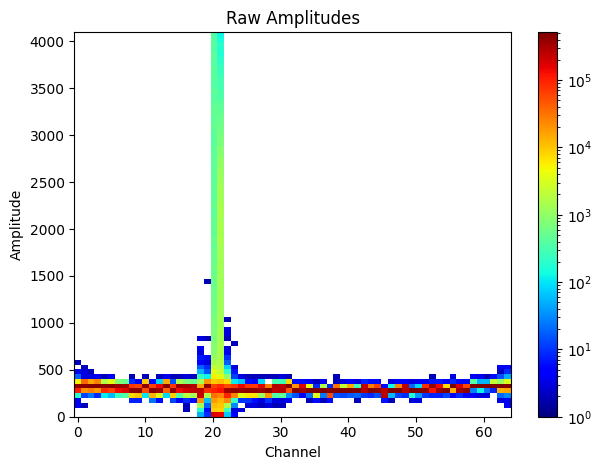

In [9]:
det.dream_data.plot_raw_amps_2d_hist()

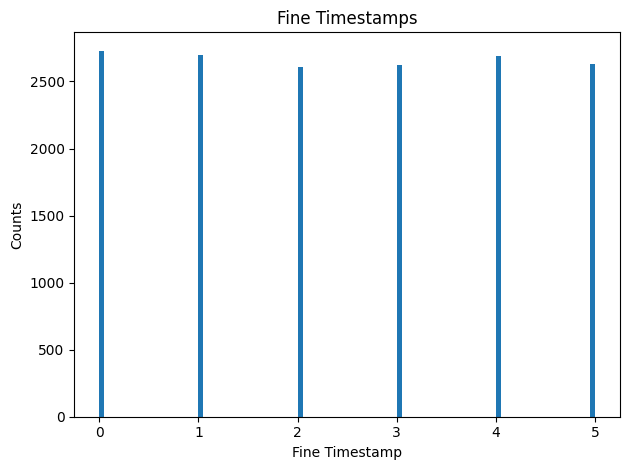

In [10]:
det.dream_data.plot_fine_timestamp_hist()
det.dream_data.correct_for_fine_timestamps()

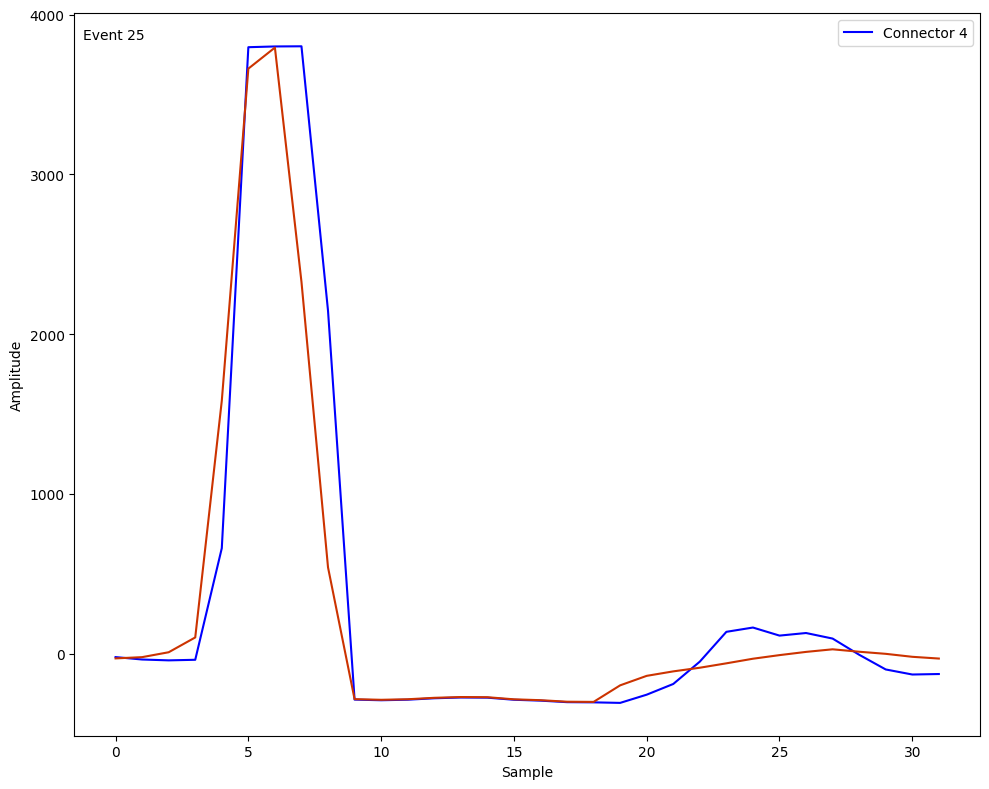

In [11]:
det.dream_data.plot_waveforms(25)

(np.float64(7.099280820597169), np.float64(0.214581104921106))

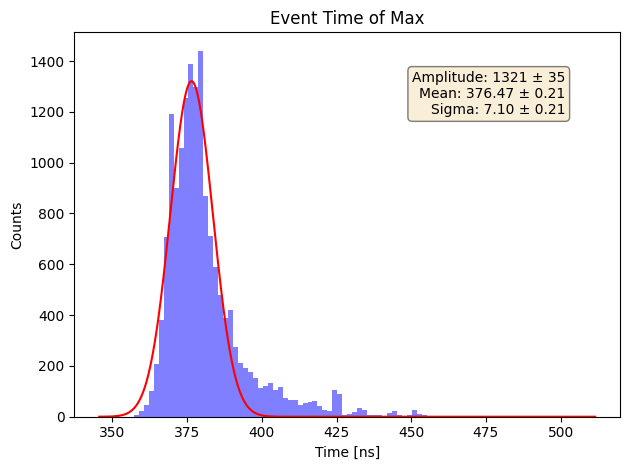

In [12]:
det.dream_data.plot_event_time_maxes(channel=0, min_amp=None, plot=True)

(np.float64(5.0847329316935586), np.float64(0.01939292722415454))

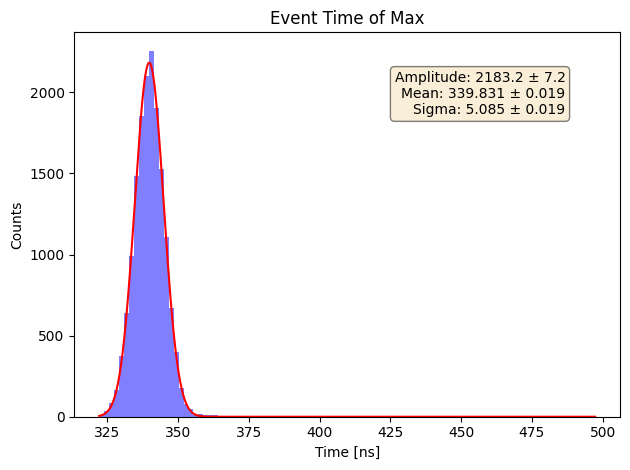

In [13]:
det.dream_data.plot_event_time_maxes(channel=1, min_amp=None, plot=True)

Event nums shape: (15989,)
Time maxes shape: (15989, 2)
Ray event nums shape: (50234,)


Text(0.5, 1.0, 'Event Nums')

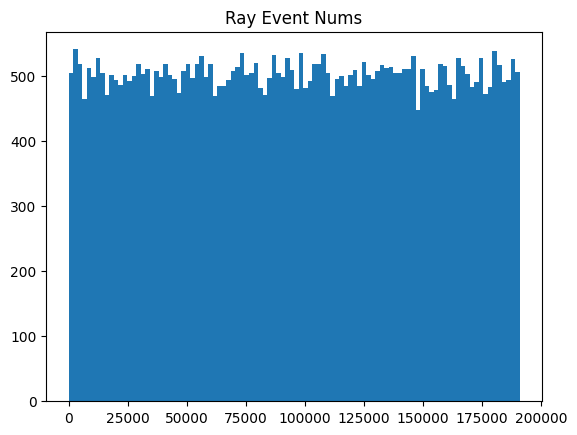

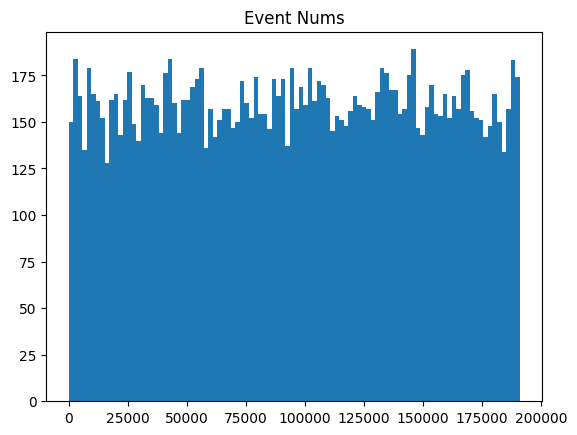

In [14]:
# Get channel 20 time maxes and corresponding event numbers
event_nums = det.dream_data.event_nums
time_maxes = det.dream_data.data_time_of_max
print(f'Event nums shape: {event_nums.shape}')
print(f'Time maxes shape: {time_maxes.shape}')
time_max_top = time_maxes[:, 1]
time_max_bot = time_maxes[:, 0]
print(f'Ray event nums shape: {event_nums_top.shape}')
# Plot ray event nums histogram
plt.figure()
plt.hist(event_nums_top, bins=100)
plt.title('Ray Event Nums')

plt.figure()
plt.hist(event_nums, bins=100)
plt.title('Event Nums')

In [15]:
# Filter ray x, y, and event nums to only include events in the detector
ray_event_nums_top = []
ray_event_nums_bot = []
ray_x_top = []
ray_y_top = []
ray_x_bot = []
ray_y_bot = []
time_max_top_filtered = []
time_max_bot_filtered = []
for i, event_num in enumerate(event_nums_top):
    if event_num in event_nums:
        ray_event_nums_top.append(event_num)
        ray_x_top.append(x_top[i])
        ray_y_top.append(y_top[i])
        event_num_index = np.where(event_nums == event_num)[0][0]
        time_max_top_filtered.append(time_max_top[event_num_index])
for i, event_num in enumerate(event_nums_bot):
    if event_num in event_nums:
        ray_event_nums_bot.append(event_num)
        ray_x_bot.append(x_bot[i])
        ray_y_bot.append(y_bot[i])
        event_num_index = np.where(event_nums == event_num)[0][0]
        time_max_bot_filtered.append(time_max_bot[event_num_index])

In [16]:
print(f'Shape ray_x_top: {len(ray_x_top)}')
print(f'Shape time_max_top: {len(time_max_top)}')
print(f'Shape time_max_top_filtered: {len(time_max_top_filtered)}')

Shape ray_x_top: 15989
Shape time_max_top: 15989
Shape time_max_top_filtered: 15989


(5.4, 6.0)

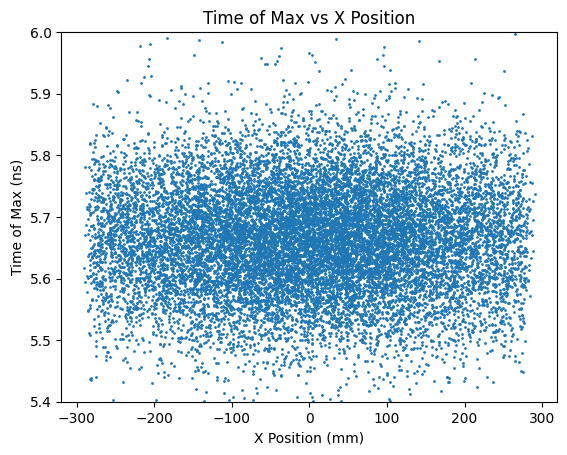

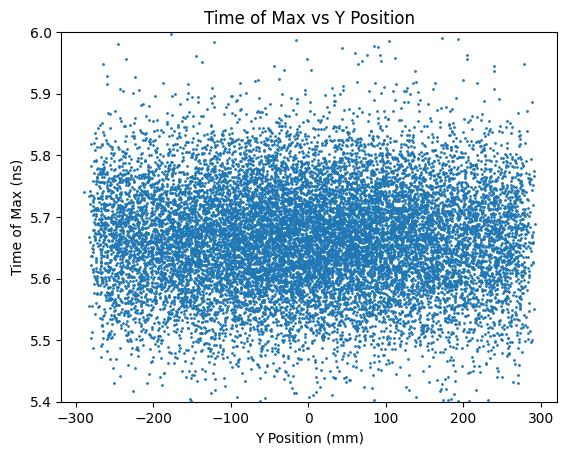

In [20]:
# For top detector plot time of max vs x and y in two plots
plt.figure()
plt.scatter(ray_x_top, time_max_top, s=1)
plt.xlabel('X Position (mm)')
plt.ylabel('Time of Max (ns)')
plt.title('Time of Max vs X Position')
plt.ylim(5.4, 6.0)
plt.figure()
plt.scatter(ray_y_top, time_max_top, s=1)
plt.xlabel('Y Position (mm)')
plt.ylabel('Time of Max (ns)')
plt.title('Time of Max vs Y Position')
plt.ylim(5.4, 6.0)

(5.4, 6.0)

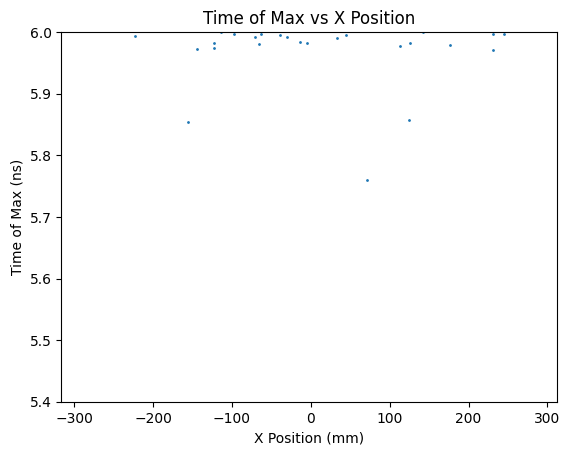

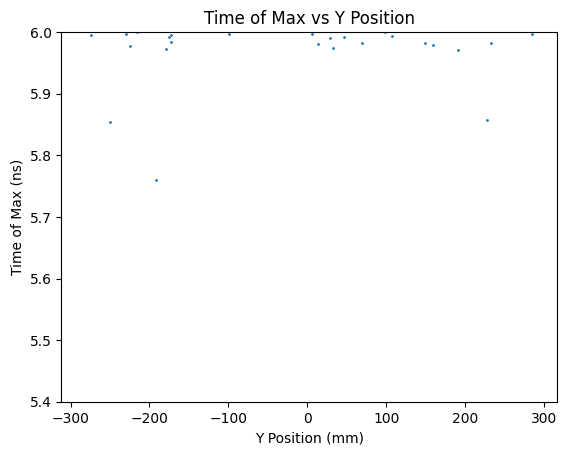

In [18]:
# For bottom detector plot time of max vs x and y in two plots
plt.figure()
plt.scatter(ray_x_bot, time_max_bot, s=1)
plt.xlabel('X Position (mm)')
plt.ylabel('Time of Max (ns)')
plt.title('Time of Max vs X Position')
plt.ylim(5.4, 6.0)
plt.figure()
plt.scatter(ray_y_bot, time_max_bot, s=1)
plt.xlabel('Y Position (mm)')
plt.ylabel('Time of Max (ns)')
plt.title('Time of Max vs Y Position')
plt.ylim(5.4, 6.0)